# Сжатие данных с помощью понижения размерности. Выделение признаков.

#### PCA (метод главных компонент)

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target + 1
df = df.reindex(columns=['target'] + list(df.columns[:-1]))
df.head()

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [2]:
df.iloc[:, 0].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [3]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=0)

1) Стандартизация данных:

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

Вычисление ковариационной матрицы признаков. Положительная ковариация между двумя признаками указывает на то, что признаки изменяются или уменьшаются, а отрицательная ковариация - что признаки изменяются в противоположных направлениях.

Собственные векторы ковариационной матрицы представляют главные компоненты (направления максимальной дисперсии), а соответствующие собственные значения будут определять их величину.
Собственный вектор v удовлетворяет условию:
матрица * собственный вектор = собственное значение * собственный вектор

In [5]:
cov_mat = np.cov(X_train_std.T)
print(cov_mat.shape)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Собственные значения: \n', eigen_vals)

(13, 13)
Собственные значения: 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


Для понижения размерности выбирают поднабор собственных векторов (главных компонент), которые содержат бОльшую часть информации (дисперсии). Собственные значения определяют величину собственных векторов, поэтому необходимо отсортировать собственные значения в порядке убывания. Затем помжно выбрать k верхних собственных векторов на основе велечин соответствующих собственных значений.

Прежде чем выбирать k наиболее информативных собственных векторов, можно построить график с коэффициентами объясненной дисперсии собственных значений.
Коэф. объясн. дисперсии собственного значения представляет собой долю собственного значения от общей суммы:

<img src="pic/coef.png" width="300"/>

Затем можно подсчитать кумулятивную (накапливающуюся) сумму объясненных дисперсий для отображения на графике.

In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

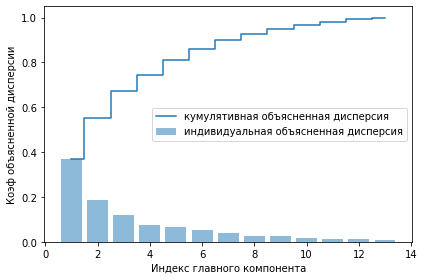

In [7]:
import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='индивидуальная объясненная дисперсия')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='кумулятивная объясненная дисперсия')
plt.ylabel('Коэф объясненной дисперсии')
plt.xlabel('Индекс главного компонента')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Результирующий график показывает, что на долю лишь одного первого главного компонента приходится приблизительно 40% дисперсии.
Кроме того, можно заметить, что первые два главных компонента вместе объясняют почти 60% дисперсии в наборе данных. График объясненной дисперсии в чем-то похож на показатели важности признаков, вычисляемые через случайные леса. Но РСА - метод без учителя, т.е. информация о метках классов игнорируется. В то время как случайный лес применяет информацию членства в классах для подсчета показателей загрязненности узлов, дисперсия измеряет разброс значений вдоль оси признака. 

2) Трансформация признаков:

In [8]:
# Сортировка собственных пар в порядке убывания собственных значений

# создание списка кортежей (собственное значение, собственный вектор)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
# отсортировать кортежи от высоких к низким
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [9]:
eigen_pairs[0][1]

array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651])

In [10]:
np.vstack((eigen_pairs[0][1],
           eigen_pairs[1][1])).T

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [11]:
np.hstack((eigen_pairs[0][1][:, np.newaxis],
           eigen_pairs[1][1][:, np.newaxis]))

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [12]:
# выбираем два собственных ветора (для примера), чтобы
# захватить около 60% дисперсии

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('W: \n', w)

W: 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


С применением матрицы прекции можно трансформировать образец x (представленный как 13-мерный вектор-строка) в подпространство PCA (первый и второй гланые компоненты), получив двумерный вектор образца, который состоит из двух новых признаков:

In [13]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

Подобным образом можно трансформировать весь (124х13)-мерный обучающий набор данных на два главных компонента:

In [14]:
X_train_pca = X_train_std.dot(w)

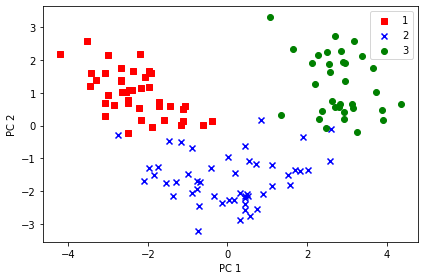

In [15]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.tight_layout()
plt.show()

<AxesSubplot:>

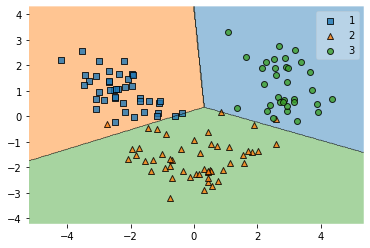

In [16]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1,
                        solver='lbfgs')
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, clf=lr)

<AxesSubplot:>

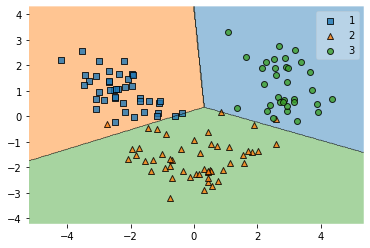

In [17]:
plot_decision_regions(X_train_pca, y_train, clf=lr)

<AxesSubplot:>

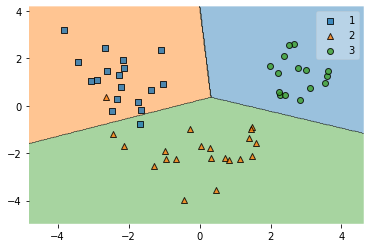

In [18]:
plot_decision_regions(X_test_pca*-1, y_test, clf=lr)

In [19]:
y_test[6]

2

In [20]:
lr.predict([X_test_pca[6]*-1])

array([2])

In [21]:
# коэф объясненной дисперсии
pca = PCA(n_components=None)

X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

#### LDA (Линейный дискриминантный анализ)

PCA - поиск ортогональных осей компонентов с максимальной дисперсией. Алгоритм без учителя.

LDA - поиск подпространства признаков, которое оптимизирует сепарабельность классов. Алгоритм с учителем.

1) Стандартизация данных:

In [22]:
X_train_std.std()

1.0

2) Вычисление векторов средних, которые  применяются для матрицы рассеяния между классами:

Каждый вектор средних хранит среднее значение признака по образцам класса i
<img src="pic/vec_mean.png" width="300"/>

In [23]:
np.set_printoptions(precision=4)  # выводить до 4 знаков после запятой

mean_vecs = []
for i in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == i], axis=0))

    print(f'M {i}: {mean_vecs[i - 1]}')

M 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]
M 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]
M 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]


In [24]:
# Матрица рассеяния внутри классов
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

print('Матрица рассеяния внутри классов: ', S_W.shape)

Матрица рассеяния внутри классов:  (13, 13)


In [25]:
# масштабирование индивидуальных матриц перед их суммированием.
# ковариационная матрица является нормализованной версией матрицы рассеяния

d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Масштабированная матрица рассеяния внутри классов: ', S_W.shape)

Масштабированная матрица рассеяния внутри классов:  (13, 13)


In [26]:
# матрица рассеяния между классами
mean_overall = np.mean(X_train_std, axis=0)
d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Матрица рассеяния между внутри классами: ', S_W.shape)

Матрица рассеяния между внутри классами:  (13, 13)


3) Выбор линейных дискриминантов для нового подпространства признаков

Вместо разложения ковариационной матрицы на собственные значения мы решаем обобщенную задачу получения собственных значений S_W^-1 * S_B

In [27]:
eigen_vals, eigen_vecs =\
    np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [28]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
for eigen_val in eigen_pairs:
    print(eigen_val[0])

349.6178089059941
172.76152218979394
2.927452713255748e-14
2.927452713255748e-14
1.480381625339196e-14
1.3533650132059972e-14
1.3533650132059972e-14
1.0917306164816297e-14
9.463628713182403e-15
8.596407573242877e-15
4.528090986998065e-15
4.528090986998065e-15
3.533213355930368e-15


In [32]:
eigen_vals[0]

(349.6178089059941+0j)

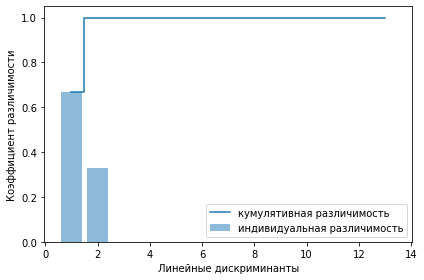

In [36]:
# построение графика различимости
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='индивидуальная различимость')
plt.step(range(1, 14), cum_discr, where='mid',
         label='кумулятивная различимость')
plt.ylabel('Коэффициент различимости')
plt.xlabel('Линейные дискриминанты')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

На графике видно, что первые два линейных дискриминанта захватывают 100% полезной информации

In [37]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))
w

array([[-0.1481,  0.4092],
       [ 0.0908,  0.1577],
       [-0.0168,  0.3537],
       [ 0.1484, -0.3223],
       [-0.0163,  0.0817],
       [ 0.1913, -0.0842],
       [-0.7338, -0.2823],
       [-0.075 ,  0.0102],
       [ 0.0018, -0.0907],
       [ 0.294 ,  0.2152],
       [-0.0328, -0.2747],
       [-0.3547,  0.0124],
       [-0.3915,  0.5958]])

In [38]:
X_train_lda = X_train_std.dot(w)

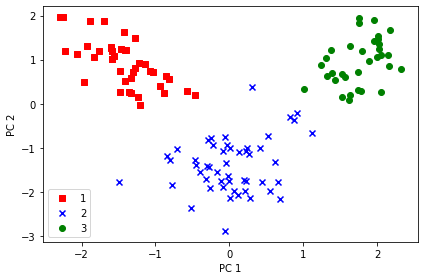

In [39]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                X_train_lda[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

<AxesSubplot:>

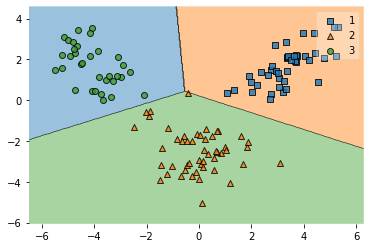

In [44]:
lr = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=1)
lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, clf=lr)

<AxesSubplot:>

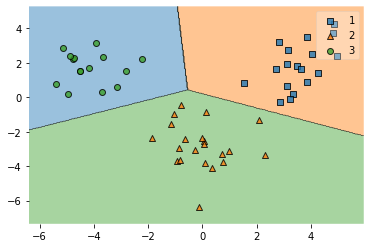

In [45]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, clf=lr)

#### Ядерный анализ главных компонент (KPCA)

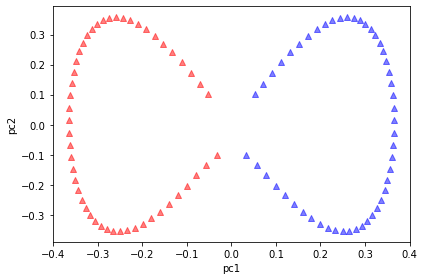

In [52]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_pca = kpca.fit_transform(X)

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1],
            color='blue', marker='^', alpha=0.5)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.tight_layout()
plt.show()

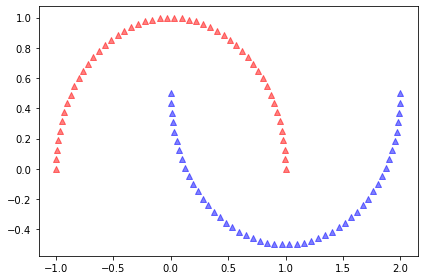

In [53]:
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            color='blue', marker='^', alpha=0.5)
plt.tight_layout()
plt.show()

С использованием PCA данные проецируются в подпространоство меньшей размерности, чтобы довести до максимума диспресиб по ортогональным  осям признаков, игнорируя метки классов.

LDA обеспечивает понижение размерности с учителем (учёт информации о метках классов в обучающем наборе данных при попытке довести до максимума сепарабельность классов в линейном пространстве признаков).

KPCA - применяется ядерный метод и временная проекция в пространство признаков более высокой размерности. Возможность сжимать наборы данных, состоящие из нелинейных признаков, в подпространство меньшей размерности, где классы становятся линейно сепарабельными.